<a href="https://colab.research.google.com/github/Jeevita-R/students-result-analysis/blob/main/student_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project is all about analysing on which factor student result is depending**




In [44]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#reading data from csv file and converting it into dataframe
df=pd.read_csv('stu_data.csv')

In [46]:
#extracting starting 5 rows from the dataframe
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [47]:
#removing unnamed: 0 column
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [48]:
#checking information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [49]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [50]:
df.shape

(30641, 14)

In [51]:
#removing nan values from dataframe
df.dropna(inplace=True)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,male,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [52]:
#setting the order of index properly
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
1,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
2,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
3,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
4,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19238,male,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49
19239,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
19240,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
19241,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


<Axes: ylabel='EthnicGroup'>

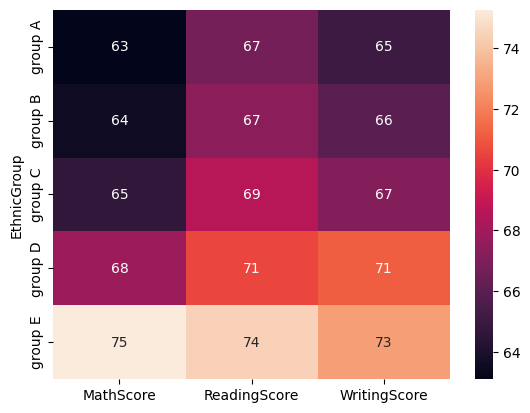

In [59]:
#analysis of student marks with respec to EthnicGroup
eg=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='EthnicGroup')
sns.heatmap(eg,annot=True)

Based on above analysis i can conclude that students who are there in **group E** and **group D** has more score compare to others

<Axes: ylabel='ParentEduc'>

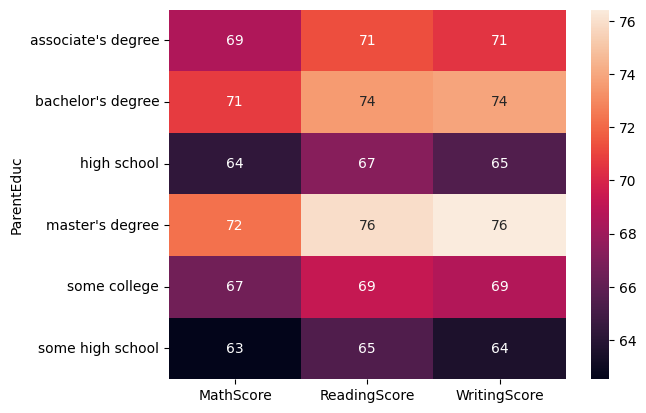

In [60]:
#analysis of student marks with respec to ParentEducation
pe=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='ParentEduc')
sns.heatmap(pe,annot=True)

Based on above analysis i can conclude if parents has good education background like bachelor's , master's and associate's degree then we can expect good score from the students.

<Axes: ylabel='LunchType'>

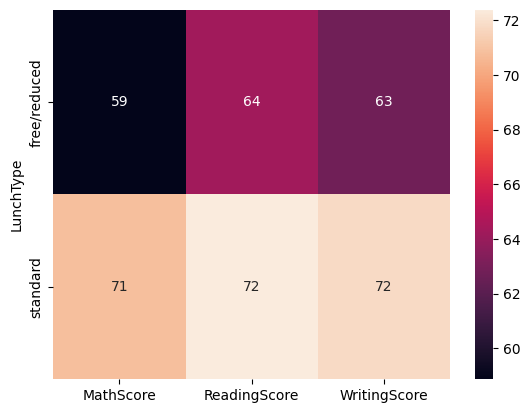

In [61]:
#analysis of student marks with respec to LunchType
lt=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='LunchType')
sns.heatmap(lt,annot=True)

Based on the above analysis i can conclude that students who eat standard food are getting more score compared to free/reduced type


<Axes: ylabel='TestPrep'>

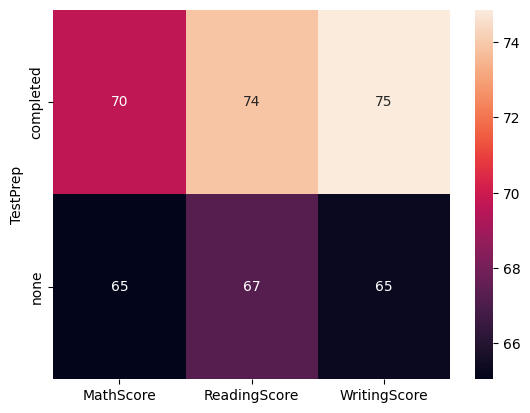

In [62]:
#analysis of student marks with respec to TestPrep
tp=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='TestPrep')
sns.heatmap(tp,annot=True)

Based on the above analysis i can conclude that students who are completed with test preparation got good score



<Axes: ylabel='ParentMaritalStatus'>

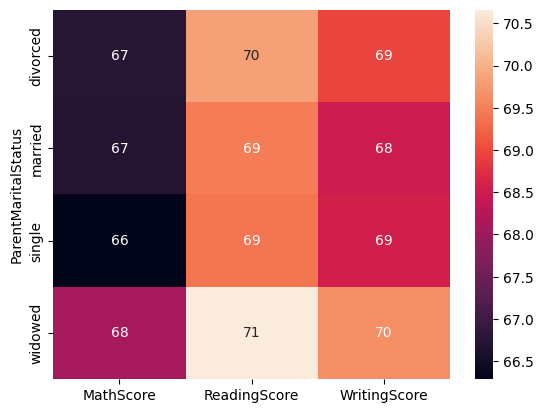

In [63]:
#analysis of student marks with respec to 	ParentMaritalStatus
ms=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='ParentMaritalStatus')
sns.heatmap(ms,annot=True)

Based on the above analysis i can conclude that parent marital status is not affecting student score


<Axes: ylabel='PracticeSport'>

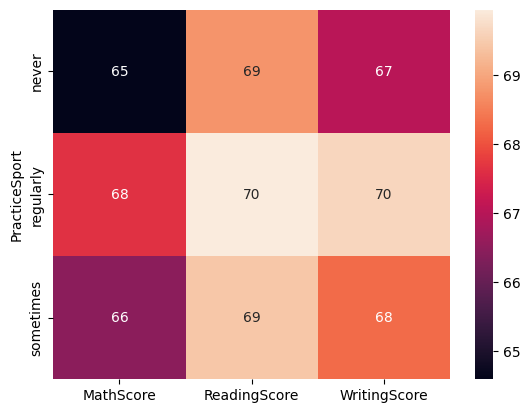

In [64]:
#analysis of student marks with respec to PracticeSport
ps=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='PracticeSport')
sns.heatmap(ps,annot=True)

Based on the above analysis i can conclude that students who practice sports regularly or sometimes can score better


<Axes: ylabel='IsFirstChild'>

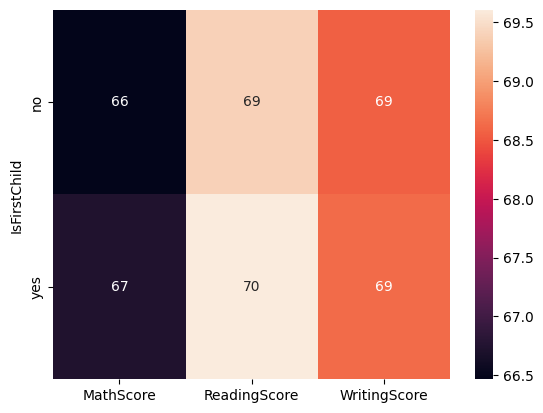

In [66]:
#analysis of student marks with respec to IsFirstChild
fc=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='IsFirstChild')
sns.heatmap(fc,annot=True)

Based on the above analysis i can conclude that student score is not depending on whether he/she is FirstChild

<Axes: ylabel='NrSiblings'>

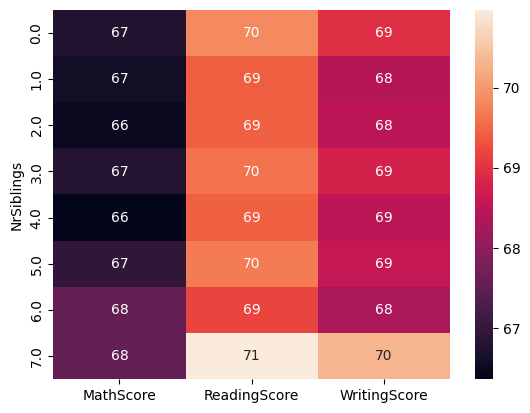

In [67]:
#analysis of student marks with respec to NrSiblings
ns=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='NrSiblings')
sns.heatmap(ns,annot=True)

Based on the above analysis i can conclude that student score is not depending on no of siblings they have


<Axes: ylabel='TransportMeans'>

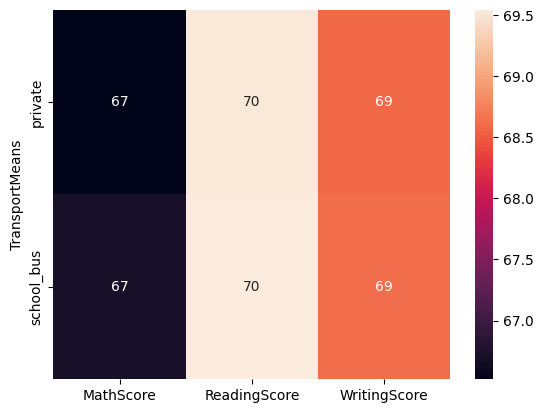

In [68]:
#analysis of student marks with respec to TransportMeans
tm=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='TransportMeans')
sns.heatmap(tm,annot=True)

Based on the above analysis i can conclude that student score is not depending on transport mode

<Axes: ylabel='WklyStudyHours'>

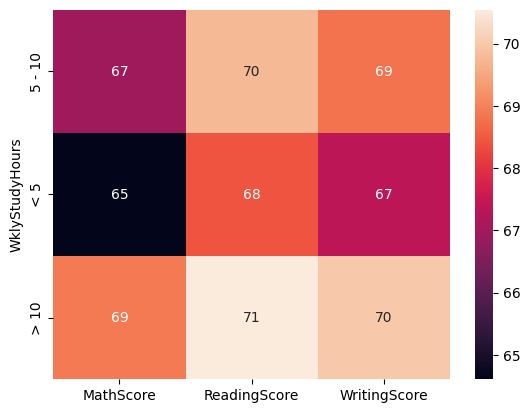

In [69]:
#analysis of student marks with respec to WklyStudyHours
wsh=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='WklyStudyHours')
sns.heatmap(wsh,annot=True)

Based on the above analysis i can conclude that students who study for 5 to 10 hours or more than that will score better

**Final_conclusion**:Students who belongs to group E and D has parents from master's,bachelor's and associate's background, who eats standard food with completion of test preperation ,practices sports sometimes or regularly and had a habbit of studying 5 to 10 hours or more than that has good mathscore ,writing and reading score.